# Regression Problem

In [1]:
#Import all important libreries:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from pathlib import Path
from pandas import read_csv
import matplotlib.pyplot as plt
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split

#libreries of pytorch:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import warnings # supress warnings
#

##### Website #####
#website of the data set:
#https://www.kaggle.com/datasets/contactprad/bike-share-daily-data

In [2]:
# load the training dataset
bike_data = pd.read_csv('data/bike_sharing_daily.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset characteristics:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In this dataset, cnt represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

As mentioned previously, you can perform some feature engineering to combine or derive new features. For example, let's add a new column named day to the dataframe by extracting the day component from the existing dteday column. The new column represents the day of the month from 1 to 31.

In [3]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3


OK, let's start our analysis of the data by examining a few key descriptive statistics. We can use the dataframe's describe method to generate these for the numeric features as well as the cnt label column.

In [4]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000



The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations (there are 731 records), the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data). From this, we can see that the mean number of daily cnt is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.

We might get a clearer idea of the distribution of cnt values by visualizing the data. Common plot types for visualizing numeric data distributions are histograms and box plots, so let's use Python's matplotlib library to create one of each of these for the cnt column.

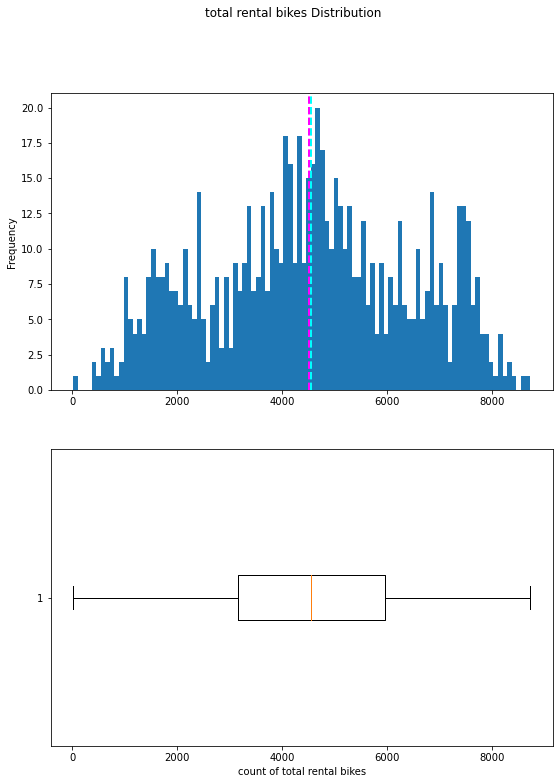

In [5]:
# Get the label column
label = bike_data['cnt']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('count of total rental bikes')

# Add a title to the Figure
fig.suptitle('total rental bikes Distribution')

# Show the figure
fig.show()

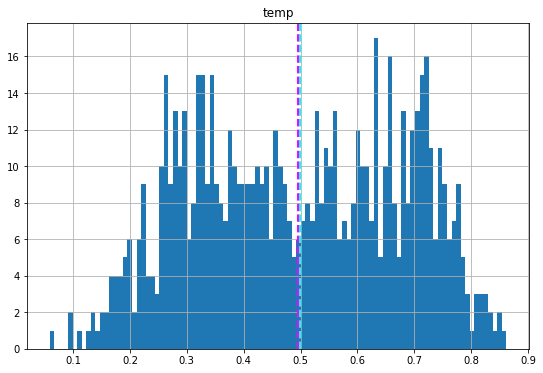

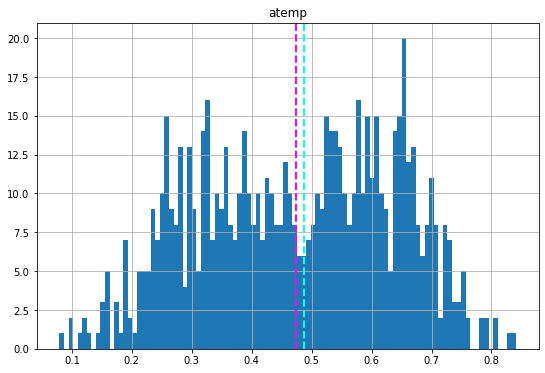

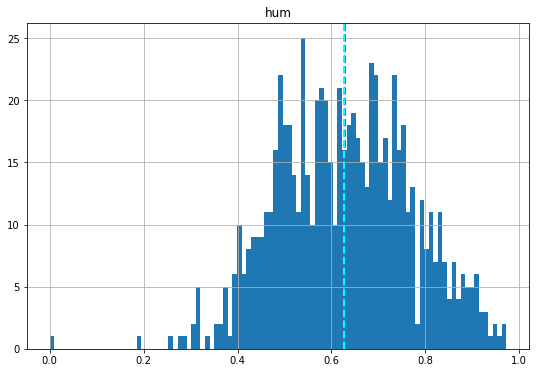

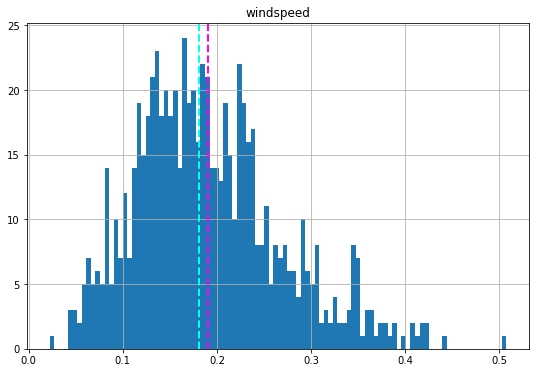

In [6]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

We've explored the distribution of the numeric values in the dataset, but what about the categorical features? These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a bar chart showing the count of each discrete value for each category.

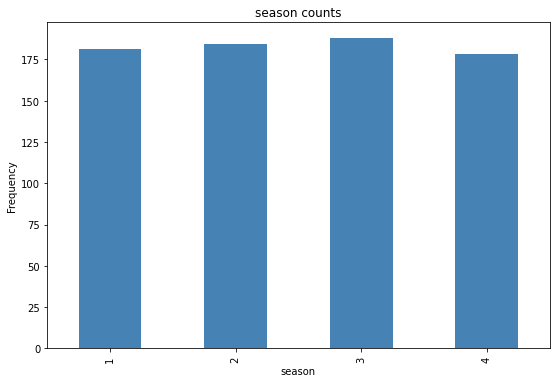

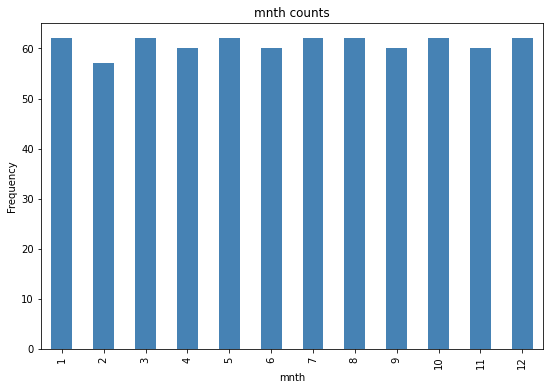

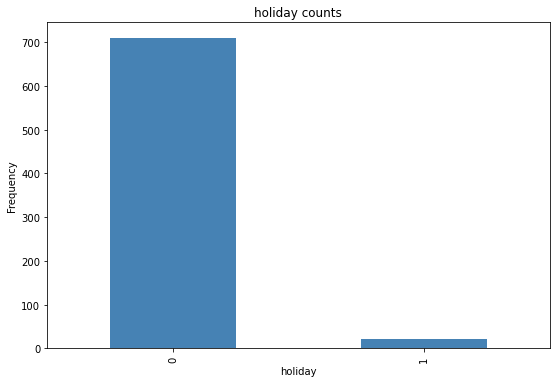

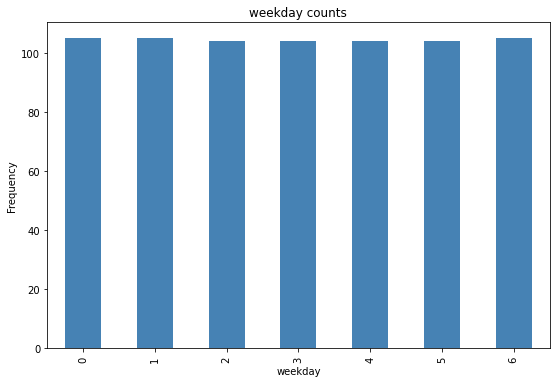

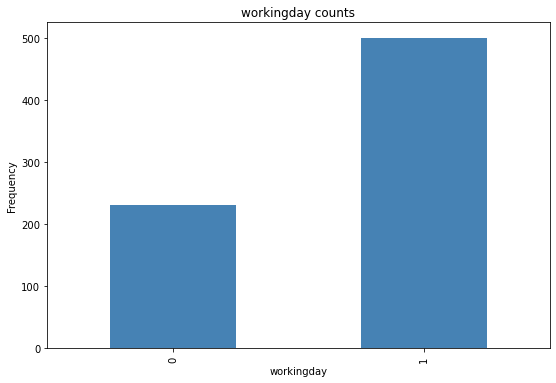

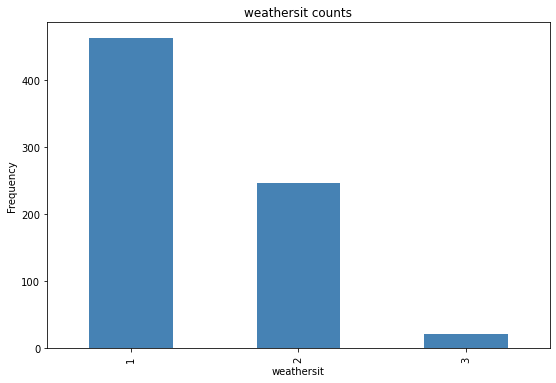

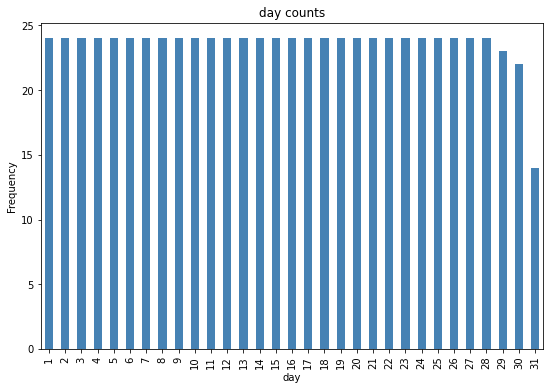

In [7]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:


<ul>

<li>holiday:</li> There are many fewer days that are holidays than days that aren't.

<li>workingday:</li> There are more working days than non-working days.

<li>weathersit:</li> Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.
</ul>
Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship.

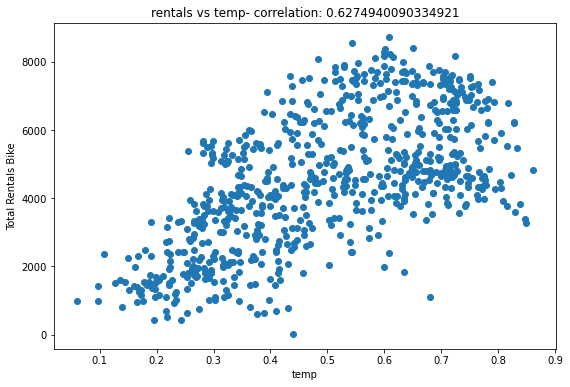

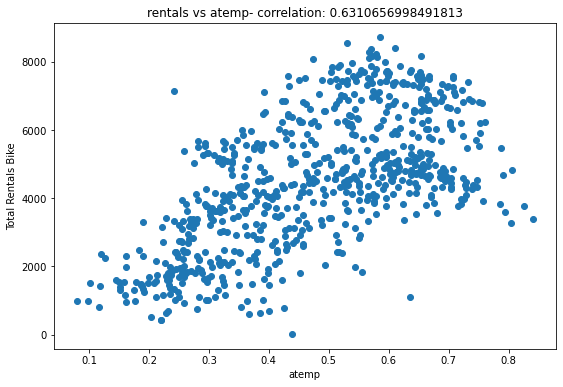

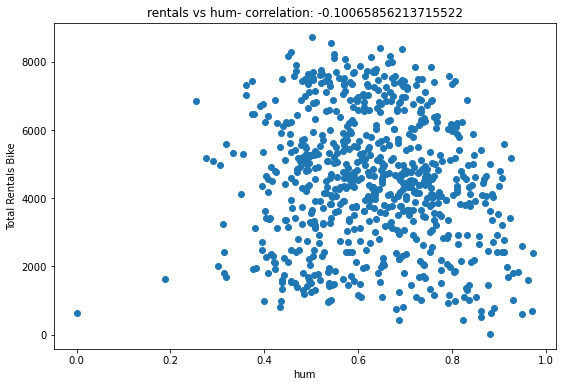

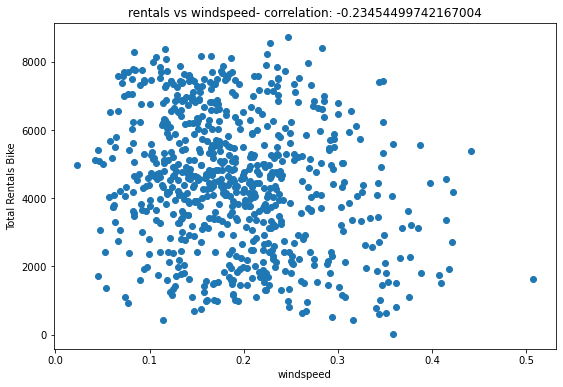

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Total Rentals Bike')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

<p>Conclusion:</p>
<p>The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.</p>

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

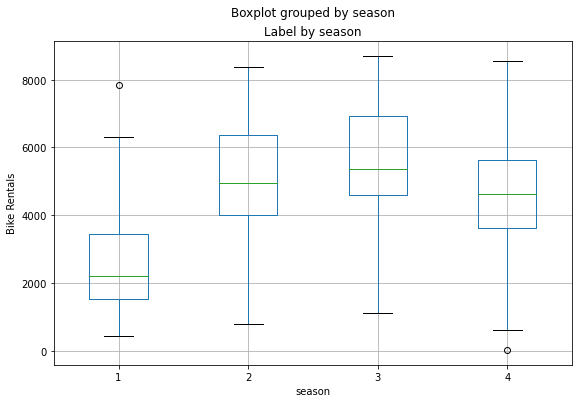

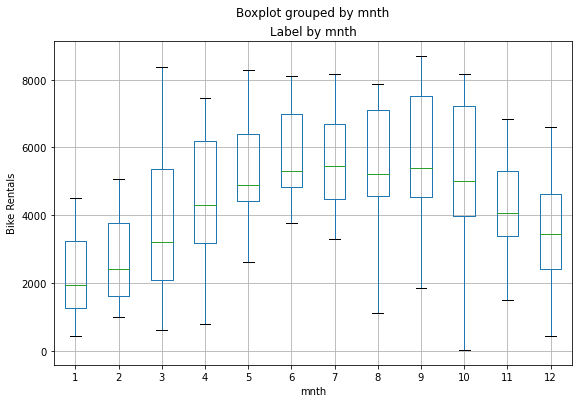

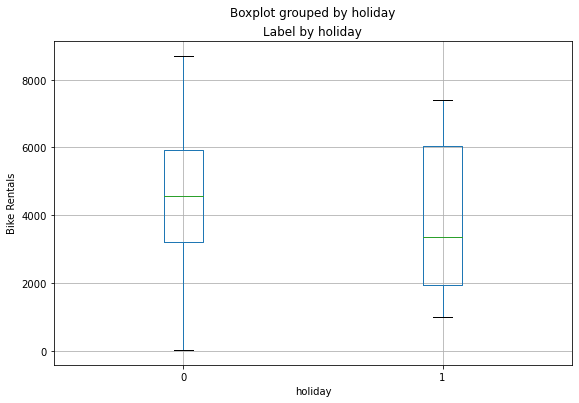

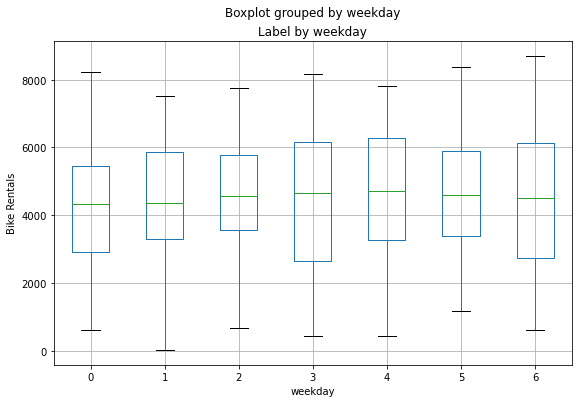

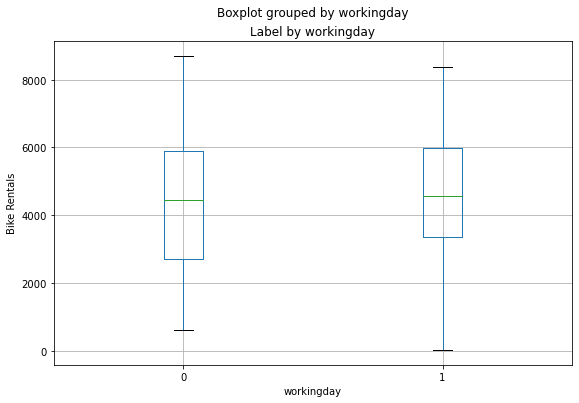

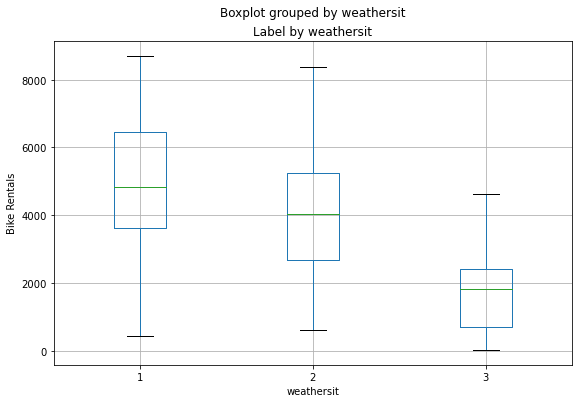

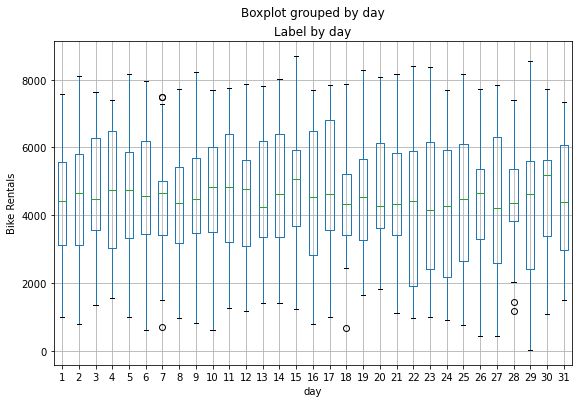

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. For example, there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). Similarly, there are notable differences for holiday and workingday categories. There's a noticeable trend that shows different rental distributions in summer and fall months compared to spring and winter months. The weathersit category also seems to make a difference in rental distribution. The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

<blockquote>Some definitions:</blockquote>
<ul>
<li>Bias is the error that is caused by the model when we try to approximate a complex real-world problem using a simple model.
<li>Variance is the amount by which the model would change if we use different sample data for model training.
<li>Irreducible error is caused because of some unknown reason.
</ul>

# Train a Regression Model

In [10]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['cnt'].values
#print('Features:',X[:2], '\nLabels:', y[:2], sep='\n')

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.

We could train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. It's important to split the data randomly (rather than say, taking the first 70% of the data for training and keeping the rest for validation). This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distribution to the data on which it was trained).

To randomly split the data, we'll use the train_test_split function in the scikit-learn library. This library is one of the most widely used machine learning packages for Python.

In [11]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

print ('Informations after splitting: ')
print ('Training Set:')
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print ('Test Set:')
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

Informations after splitting: 
Training Set:
X_train :  (657, 10)
y_train :  (657,)
Test Set:
X_test :  (74, 10)
y_test :  (74,)


# Build a Linear Regression with a Neural Network in PyTorch

![alternative text](singlePerceptron.png)

In [12]:
#Let’s create a model called linearRegression and then I’ll walk you through the syntax:
#Singlelayer Perceptron for regression.

class linearRegression(nn.Module):  # our class inherits from nn.Module and we can call it anything we like
    def __init__(self, input_size, output_size):
        super().__init__()                                # super().__init__() makes our class inherit everything from torch.nn.Module
        self.linear = nn.Linear(input_size, output_size)  # this is a simple linear layer: wX + b

    def forward(self, x):
        out = self.linear(x)
        return out

In [36]:
n_samples, in_features = X_train.shape
model = linearRegression(input_size=in_features, output_size=1)
print(model)

linearRegression(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


In [37]:
#the more useful summary()
from torchsummary import summary

summary(model,(1,in_features));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 1]                11
Total params: 11
Trainable params: 11
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Notice how we have 11 parameters? We have 10 for the weight (w1 to w10) and one for the bias (w0). These were initialized randomly by PyTorch when we created our model. They can be accessed with model.state_dict():

In [38]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.2466,  0.0324,  0.1727, -0.2868,  0.1943, -0.0453,  0.0097, -0.0725,
                       -0.2301,  0.2803]])),
             ('linear.bias', tensor([0.0169]))])

In [44]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class LoadTensorData(Dataset):

    def __init__(self,X,y):
        # data loading and cast to float Tensor
        self.X_ts = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        #reshape target y_train_ts and y_test_ts
        self.y_ts = y.view(y.shape[0], 1)
        self.n_samples = X.shape[0]
        
    def __getitem__(self, index):
        # return dataset[0]
        return self.X_ts[index],self.y_ts[index]
    
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [52]:
Traindata = LoadTensorData(X_train, y_train)
batch_size=50
train_loader = DataLoader(Traindata,batch_size=batch_size,shuffle=True)
#looping training dataset:
for i, (data, labels) in enumerate(train_loader):
    print(data.shape, labels.shape)
    print(f"data:{data[:2]}, labels{labels[:2]}")

torch.Size([50, 10]) torch.Size([50, 1])
data:tensor([[3.0000, 6.0000, 0.0000, 2.0000, 1.0000, 2.0000, 0.6808, 0.6376, 0.7704,
         0.1710],
        [1.0000, 3.0000, 0.0000, 2.0000, 1.0000, 1.0000, 0.2667, 0.2639, 0.5350,
         0.2164]]), labelstensor([[4835.],
        [1851.]])
torch.Size([50, 10]) torch.Size([50, 1])
data:tensor([[2.0000, 5.0000, 0.0000, 5.0000, 1.0000, 1.0000, 0.6817, 0.6370, 0.6538,
         0.2407],
        [2.0000, 4.0000, 0.0000, 3.0000, 1.0000, 2.0000, 0.6200, 0.5751, 0.8354,
         0.3122]]), labelstensor([[4679.],
        [3872.]])
torch.Size([50, 10]) torch.Size([50, 1])
data:tensor([[2.0000, 5.0000, 0.0000, 2.0000, 1.0000, 2.0000, 0.6167, 0.5821, 0.6971,
         0.3427],
        [3.0000, 6.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7158, 0.6540, 0.5042,
         0.3004]]), labelstensor([[4451.],
        [6779.]])
torch.Size([50, 10]) torch.Size([50, 1])
data:tensor([[2.0000, 6.0000, 0.0000, 5.0000, 1.0000, 2.0000, 0.6542, 0.6080, 0.7554,
         0.2

In [61]:
import math
import time

# 1) Model
# Linear model f = wx + b
input_size = in_features
output_size = 1
model = linearRegression(input_size=in_features, output_size=1)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
# Epoch = 1 foward and backward pass od all training samples.
# batch_size = number of training samples in one forward & backward pass.
# number of iterations = number od passes, each pass using [batch_size] number of samples.
# e.g: 100 samples, batch_size = 20 ===> 100/20 = 5 iterations for 1 epoch.

num_epochs = 1000
total_samples = len(X_train)
n_iterations = math.ceil(total_samples/batch_size)

for epoch in range(num_epochs):
    #looping training dataset:
    for i, (data, labels) in enumerate(train_loader):
            # Forward pass and loss
            y_predicted = model(data)
            loss = criterion(y_predicted, labels)
            
            # Backward pass and update
            loss.backward()
            optimizer.step()
            
            # zero grad before new step
            optimizer.zero_grad()
            
            if(i+1)%2 == 0:
                print(f'epoch: {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, loss = {loss.item():.4f}, inputs {data.shape}')

epoch: 1/1000, step 2/14, loss = 6994211.0000, inputs torch.Size([50, 10])
epoch: 1/1000, step 4/14, loss = 3853251.7500, inputs torch.Size([50, 10])
epoch: 1/1000, step 6/14, loss = 9152609.0000, inputs torch.Size([50, 10])
epoch: 1/1000, step 8/14, loss = 5223046.5000, inputs torch.Size([50, 10])
epoch: 1/1000, step 10/14, loss = 3377779.7500, inputs torch.Size([50, 10])
epoch: 1/1000, step 12/14, loss = 6261328.0000, inputs torch.Size([50, 10])
epoch: 1/1000, step 14/14, loss = 2471484.0000, inputs torch.Size([7, 10])
epoch: 2/1000, step 2/14, loss = 6238464.0000, inputs torch.Size([50, 10])
epoch: 2/1000, step 4/14, loss = 3769555.2500, inputs torch.Size([50, 10])
epoch: 2/1000, step 6/14, loss = 4519303.5000, inputs torch.Size([50, 10])
epoch: 2/1000, step 8/14, loss = 4386288.0000, inputs torch.Size([50, 10])
epoch: 2/1000, step 10/14, loss = 4632856.5000, inputs torch.Size([50, 10])
epoch: 2/1000, step 12/14, loss = 4345899.5000, inputs torch.Size([50, 10])
epoch: 2/1000, step 1

epoch: 28/1000, step 10/14, loss = 2612479.0000, inputs torch.Size([50, 10])
epoch: 28/1000, step 12/14, loss = 2072197.1250, inputs torch.Size([50, 10])
epoch: 28/1000, step 14/14, loss = 2126738.7500, inputs torch.Size([7, 10])
epoch: 29/1000, step 2/14, loss = 2464890.0000, inputs torch.Size([50, 10])
epoch: 29/1000, step 4/14, loss = 2646046.7500, inputs torch.Size([50, 10])
epoch: 29/1000, step 6/14, loss = 2349173.7500, inputs torch.Size([50, 10])
epoch: 29/1000, step 8/14, loss = 3064645.7500, inputs torch.Size([50, 10])
epoch: 29/1000, step 10/14, loss = 1842498.7500, inputs torch.Size([50, 10])
epoch: 29/1000, step 12/14, loss = 2792165.7500, inputs torch.Size([50, 10])
epoch: 29/1000, step 14/14, loss = 1382268.3750, inputs torch.Size([7, 10])
epoch: 30/1000, step 2/14, loss = 1968314.5000, inputs torch.Size([50, 10])
epoch: 30/1000, step 4/14, loss = 1490554.8750, inputs torch.Size([50, 10])
epoch: 30/1000, step 6/14, loss = 2711234.5000, inputs torch.Size([50, 10])
epoch: 3

epoch: 57/1000, step 2/14, loss = 2135773.5000, inputs torch.Size([50, 10])
epoch: 57/1000, step 4/14, loss = 1414089.5000, inputs torch.Size([50, 10])
epoch: 57/1000, step 6/14, loss = 1637134.7500, inputs torch.Size([50, 10])
epoch: 57/1000, step 8/14, loss = 1621906.2500, inputs torch.Size([50, 10])
epoch: 57/1000, step 10/14, loss = 2519141.0000, inputs torch.Size([50, 10])
epoch: 57/1000, step 12/14, loss = 2486892.5000, inputs torch.Size([50, 10])
epoch: 57/1000, step 14/14, loss = 454373.1562, inputs torch.Size([7, 10])
epoch: 58/1000, step 2/14, loss = 2412424.2500, inputs torch.Size([50, 10])
epoch: 58/1000, step 4/14, loss = 2270628.2500, inputs torch.Size([50, 10])
epoch: 58/1000, step 6/14, loss = 2002049.1250, inputs torch.Size([50, 10])
epoch: 58/1000, step 8/14, loss = 1840865.6250, inputs torch.Size([50, 10])
epoch: 58/1000, step 10/14, loss = 1860666.3750, inputs torch.Size([50, 10])
epoch: 58/1000, step 12/14, loss = 1824576.5000, inputs torch.Size([50, 10])
epoch: 58

epoch: 86/1000, step 6/14, loss = 2299900.7500, inputs torch.Size([50, 10])
epoch: 86/1000, step 8/14, loss = 2317154.0000, inputs torch.Size([50, 10])
epoch: 86/1000, step 10/14, loss = 2493732.2500, inputs torch.Size([50, 10])
epoch: 86/1000, step 12/14, loss = 1668525.1250, inputs torch.Size([50, 10])
epoch: 86/1000, step 14/14, loss = 2380919.7500, inputs torch.Size([7, 10])
epoch: 87/1000, step 2/14, loss = 3456685.5000, inputs torch.Size([50, 10])
epoch: 87/1000, step 4/14, loss = 1755321.0000, inputs torch.Size([50, 10])
epoch: 87/1000, step 6/14, loss = 1660597.5000, inputs torch.Size([50, 10])
epoch: 87/1000, step 8/14, loss = 2152125.5000, inputs torch.Size([50, 10])
epoch: 87/1000, step 10/14, loss = 2575471.7500, inputs torch.Size([50, 10])
epoch: 87/1000, step 12/14, loss = 1600432.0000, inputs torch.Size([50, 10])
epoch: 87/1000, step 14/14, loss = 1600586.3750, inputs torch.Size([7, 10])
epoch: 88/1000, step 2/14, loss = 2381354.5000, inputs torch.Size([50, 10])
epoch: 8

epoch: 116/1000, step 6/14, loss = 2223950.0000, inputs torch.Size([50, 10])
epoch: 116/1000, step 8/14, loss = 1659371.5000, inputs torch.Size([50, 10])
epoch: 116/1000, step 10/14, loss = 1625356.5000, inputs torch.Size([50, 10])
epoch: 116/1000, step 12/14, loss = 1416190.7500, inputs torch.Size([50, 10])
epoch: 116/1000, step 14/14, loss = 2700292.0000, inputs torch.Size([7, 10])
epoch: 117/1000, step 2/14, loss = 1749349.2500, inputs torch.Size([50, 10])
epoch: 117/1000, step 4/14, loss = 1432805.7500, inputs torch.Size([50, 10])
epoch: 117/1000, step 6/14, loss = 1725689.2500, inputs torch.Size([50, 10])
epoch: 117/1000, step 8/14, loss = 1760899.8750, inputs torch.Size([50, 10])
epoch: 117/1000, step 10/14, loss = 2295549.5000, inputs torch.Size([50, 10])
epoch: 117/1000, step 12/14, loss = 2234542.0000, inputs torch.Size([50, 10])
epoch: 117/1000, step 14/14, loss = 2691802.0000, inputs torch.Size([7, 10])
epoch: 118/1000, step 2/14, loss = 1571902.1250, inputs torch.Size([50, 

epoch: 147/1000, step 8/14, loss = 1916273.0000, inputs torch.Size([50, 10])
epoch: 147/1000, step 10/14, loss = 1983755.5000, inputs torch.Size([50, 10])
epoch: 147/1000, step 12/14, loss = 1753909.6250, inputs torch.Size([50, 10])
epoch: 147/1000, step 14/14, loss = 3914876.0000, inputs torch.Size([7, 10])
epoch: 148/1000, step 2/14, loss = 1952916.5000, inputs torch.Size([50, 10])
epoch: 148/1000, step 4/14, loss = 1671780.6250, inputs torch.Size([50, 10])
epoch: 148/1000, step 6/14, loss = 2096046.7500, inputs torch.Size([50, 10])
epoch: 148/1000, step 8/14, loss = 1272001.8750, inputs torch.Size([50, 10])
epoch: 148/1000, step 10/14, loss = 1886135.3750, inputs torch.Size([50, 10])
epoch: 148/1000, step 12/14, loss = 2551950.5000, inputs torch.Size([50, 10])
epoch: 148/1000, step 14/14, loss = 1820032.8750, inputs torch.Size([7, 10])
epoch: 149/1000, step 2/14, loss = 1997047.6250, inputs torch.Size([50, 10])
epoch: 149/1000, step 4/14, loss = 1846606.7500, inputs torch.Size([50, 

epoch: 178/1000, step 10/14, loss = 1736820.3750, inputs torch.Size([50, 10])
epoch: 178/1000, step 12/14, loss = 1933089.0000, inputs torch.Size([50, 10])
epoch: 178/1000, step 14/14, loss = 853973.4375, inputs torch.Size([7, 10])
epoch: 179/1000, step 2/14, loss = 2776533.7500, inputs torch.Size([50, 10])
epoch: 179/1000, step 4/14, loss = 1611340.1250, inputs torch.Size([50, 10])
epoch: 179/1000, step 6/14, loss = 1676111.0000, inputs torch.Size([50, 10])
epoch: 179/1000, step 8/14, loss = 2088480.0000, inputs torch.Size([50, 10])
epoch: 179/1000, step 10/14, loss = 2264165.0000, inputs torch.Size([50, 10])
epoch: 179/1000, step 12/14, loss = 1777490.5000, inputs torch.Size([50, 10])
epoch: 179/1000, step 14/14, loss = 4308612.0000, inputs torch.Size([7, 10])
epoch: 180/1000, step 2/14, loss = 2100984.2500, inputs torch.Size([50, 10])
epoch: 180/1000, step 4/14, loss = 1831935.0000, inputs torch.Size([50, 10])
epoch: 180/1000, step 6/14, loss = 2420070.5000, inputs torch.Size([50, 1

epoch: 210/1000, step 14/14, loss = 1479244.6250, inputs torch.Size([7, 10])
epoch: 211/1000, step 2/14, loss = 1447640.0000, inputs torch.Size([50, 10])
epoch: 211/1000, step 4/14, loss = 1705301.5000, inputs torch.Size([50, 10])
epoch: 211/1000, step 6/14, loss = 1714435.5000, inputs torch.Size([50, 10])
epoch: 211/1000, step 8/14, loss = 2188617.5000, inputs torch.Size([50, 10])
epoch: 211/1000, step 10/14, loss = 1489039.8750, inputs torch.Size([50, 10])
epoch: 211/1000, step 12/14, loss = 1992528.1250, inputs torch.Size([50, 10])
epoch: 211/1000, step 14/14, loss = 1814238.2500, inputs torch.Size([7, 10])
epoch: 212/1000, step 2/14, loss = 1613135.3750, inputs torch.Size([50, 10])
epoch: 212/1000, step 4/14, loss = 2023799.8750, inputs torch.Size([50, 10])
epoch: 212/1000, step 6/14, loss = 1583398.2500, inputs torch.Size([50, 10])
epoch: 212/1000, step 8/14, loss = 1820327.0000, inputs torch.Size([50, 10])
epoch: 212/1000, step 10/14, loss = 1739915.8750, inputs torch.Size([50, 1

epoch: 241/1000, step 10/14, loss = 2102821.7500, inputs torch.Size([50, 10])
epoch: 241/1000, step 12/14, loss = 1700778.2500, inputs torch.Size([50, 10])
epoch: 241/1000, step 14/14, loss = 1769248.6250, inputs torch.Size([7, 10])
epoch: 242/1000, step 2/14, loss = 3154805.0000, inputs torch.Size([50, 10])
epoch: 242/1000, step 4/14, loss = 1365069.6250, inputs torch.Size([50, 10])
epoch: 242/1000, step 6/14, loss = 2217962.5000, inputs torch.Size([50, 10])
epoch: 242/1000, step 8/14, loss = 1796368.6250, inputs torch.Size([50, 10])
epoch: 242/1000, step 10/14, loss = 1373023.8750, inputs torch.Size([50, 10])
epoch: 242/1000, step 12/14, loss = 1236925.5000, inputs torch.Size([50, 10])
epoch: 242/1000, step 14/14, loss = 672221.6250, inputs torch.Size([7, 10])
epoch: 243/1000, step 2/14, loss = 1766979.8750, inputs torch.Size([50, 10])
epoch: 243/1000, step 4/14, loss = 1848604.3750, inputs torch.Size([50, 10])
epoch: 243/1000, step 6/14, loss = 1743855.0000, inputs torch.Size([50, 1

epoch: 274/1000, step 2/14, loss = 1768410.8750, inputs torch.Size([50, 10])
epoch: 274/1000, step 4/14, loss = 1810937.5000, inputs torch.Size([50, 10])
epoch: 274/1000, step 6/14, loss = 1576194.8750, inputs torch.Size([50, 10])
epoch: 274/1000, step 8/14, loss = 3228542.0000, inputs torch.Size([50, 10])
epoch: 274/1000, step 10/14, loss = 2179641.2500, inputs torch.Size([50, 10])
epoch: 274/1000, step 12/14, loss = 2320960.2500, inputs torch.Size([50, 10])
epoch: 274/1000, step 14/14, loss = 2945654.0000, inputs torch.Size([7, 10])
epoch: 275/1000, step 2/14, loss = 2037697.1250, inputs torch.Size([50, 10])
epoch: 275/1000, step 4/14, loss = 2332367.0000, inputs torch.Size([50, 10])
epoch: 275/1000, step 6/14, loss = 2327671.2500, inputs torch.Size([50, 10])
epoch: 275/1000, step 8/14, loss = 1607210.2500, inputs torch.Size([50, 10])
epoch: 275/1000, step 10/14, loss = 1382534.8750, inputs torch.Size([50, 10])
epoch: 275/1000, step 12/14, loss = 2307267.7500, inputs torch.Size([50, 

epoch: 306/1000, step 8/14, loss = 2143013.5000, inputs torch.Size([50, 10])
epoch: 306/1000, step 10/14, loss = 1938027.0000, inputs torch.Size([50, 10])
epoch: 306/1000, step 12/14, loss = 2540877.7500, inputs torch.Size([50, 10])
epoch: 306/1000, step 14/14, loss = 2983063.5000, inputs torch.Size([7, 10])
epoch: 307/1000, step 2/14, loss = 1469157.5000, inputs torch.Size([50, 10])
epoch: 307/1000, step 4/14, loss = 2141683.2500, inputs torch.Size([50, 10])
epoch: 307/1000, step 6/14, loss = 1432969.1250, inputs torch.Size([50, 10])
epoch: 307/1000, step 8/14, loss = 1461687.3750, inputs torch.Size([50, 10])
epoch: 307/1000, step 10/14, loss = 1953182.1250, inputs torch.Size([50, 10])
epoch: 307/1000, step 12/14, loss = 1810045.8750, inputs torch.Size([50, 10])
epoch: 307/1000, step 14/14, loss = 3334723.5000, inputs torch.Size([7, 10])
epoch: 308/1000, step 2/14, loss = 1553311.2500, inputs torch.Size([50, 10])
epoch: 308/1000, step 4/14, loss = 1839074.2500, inputs torch.Size([50, 

epoch: 338/1000, step 10/14, loss = 1788984.7500, inputs torch.Size([50, 10])
epoch: 338/1000, step 12/14, loss = 1377532.6250, inputs torch.Size([50, 10])
epoch: 338/1000, step 14/14, loss = 1829541.0000, inputs torch.Size([7, 10])
epoch: 339/1000, step 2/14, loss = 1926154.5000, inputs torch.Size([50, 10])
epoch: 339/1000, step 4/14, loss = 1962304.5000, inputs torch.Size([50, 10])
epoch: 339/1000, step 6/14, loss = 1923393.8750, inputs torch.Size([50, 10])
epoch: 339/1000, step 8/14, loss = 1797007.0000, inputs torch.Size([50, 10])
epoch: 339/1000, step 10/14, loss = 2300542.7500, inputs torch.Size([50, 10])
epoch: 339/1000, step 12/14, loss = 2012530.1250, inputs torch.Size([50, 10])
epoch: 339/1000, step 14/14, loss = 873225.0625, inputs torch.Size([7, 10])
epoch: 340/1000, step 2/14, loss = 2869928.0000, inputs torch.Size([50, 10])
epoch: 340/1000, step 4/14, loss = 1580941.6250, inputs torch.Size([50, 10])
epoch: 340/1000, step 6/14, loss = 1723910.1250, inputs torch.Size([50, 1

epoch: 367/1000, step 12/14, loss = 2556562.2500, inputs torch.Size([50, 10])
epoch: 367/1000, step 14/14, loss = 3364464.5000, inputs torch.Size([7, 10])
epoch: 368/1000, step 2/14, loss = 2622755.7500, inputs torch.Size([50, 10])
epoch: 368/1000, step 4/14, loss = 2290795.0000, inputs torch.Size([50, 10])
epoch: 368/1000, step 6/14, loss = 1558126.7500, inputs torch.Size([50, 10])
epoch: 368/1000, step 8/14, loss = 1598394.7500, inputs torch.Size([50, 10])
epoch: 368/1000, step 10/14, loss = 1802396.5000, inputs torch.Size([50, 10])
epoch: 368/1000, step 12/14, loss = 1288192.5000, inputs torch.Size([50, 10])
epoch: 368/1000, step 14/14, loss = 2145405.7500, inputs torch.Size([7, 10])
epoch: 369/1000, step 2/14, loss = 2890048.7500, inputs torch.Size([50, 10])
epoch: 369/1000, step 4/14, loss = 2895858.5000, inputs torch.Size([50, 10])
epoch: 369/1000, step 6/14, loss = 1642930.8750, inputs torch.Size([50, 10])
epoch: 369/1000, step 8/14, loss = 1981388.5000, inputs torch.Size([50, 1

epoch: 399/1000, step 6/14, loss = 1664071.8750, inputs torch.Size([50, 10])
epoch: 399/1000, step 8/14, loss = 2370303.5000, inputs torch.Size([50, 10])
epoch: 399/1000, step 10/14, loss = 2097365.7500, inputs torch.Size([50, 10])
epoch: 399/1000, step 12/14, loss = 1283261.6250, inputs torch.Size([50, 10])
epoch: 399/1000, step 14/14, loss = 2991031.2500, inputs torch.Size([7, 10])
epoch: 400/1000, step 2/14, loss = 1561423.6250, inputs torch.Size([50, 10])
epoch: 400/1000, step 4/14, loss = 1467394.8750, inputs torch.Size([50, 10])
epoch: 400/1000, step 6/14, loss = 2057695.5000, inputs torch.Size([50, 10])
epoch: 400/1000, step 8/14, loss = 2714323.7500, inputs torch.Size([50, 10])
epoch: 400/1000, step 10/14, loss = 1234240.3750, inputs torch.Size([50, 10])
epoch: 400/1000, step 12/14, loss = 1900504.0000, inputs torch.Size([50, 10])
epoch: 400/1000, step 14/14, loss = 838158.5625, inputs torch.Size([7, 10])
epoch: 401/1000, step 2/14, loss = 1951650.3750, inputs torch.Size([50, 1

epoch: 430/1000, step 10/14, loss = 2428291.0000, inputs torch.Size([50, 10])
epoch: 430/1000, step 12/14, loss = 1901657.2500, inputs torch.Size([50, 10])
epoch: 430/1000, step 14/14, loss = 3108194.2500, inputs torch.Size([7, 10])
epoch: 431/1000, step 2/14, loss = 1706783.3750, inputs torch.Size([50, 10])
epoch: 431/1000, step 4/14, loss = 2159719.0000, inputs torch.Size([50, 10])
epoch: 431/1000, step 6/14, loss = 1559991.3750, inputs torch.Size([50, 10])
epoch: 431/1000, step 8/14, loss = 2028545.0000, inputs torch.Size([50, 10])
epoch: 431/1000, step 10/14, loss = 1549801.0000, inputs torch.Size([50, 10])
epoch: 431/1000, step 12/14, loss = 1727004.0000, inputs torch.Size([50, 10])
epoch: 431/1000, step 14/14, loss = 3070634.7500, inputs torch.Size([7, 10])
epoch: 432/1000, step 2/14, loss = 1378494.8750, inputs torch.Size([50, 10])
epoch: 432/1000, step 4/14, loss = 2060304.0000, inputs torch.Size([50, 10])
epoch: 432/1000, step 6/14, loss = 1468751.3750, inputs torch.Size([50, 

epoch: 462/1000, step 14/14, loss = 2974831.2500, inputs torch.Size([7, 10])
epoch: 463/1000, step 2/14, loss = 2188473.0000, inputs torch.Size([50, 10])
epoch: 463/1000, step 4/14, loss = 1538882.7500, inputs torch.Size([50, 10])
epoch: 463/1000, step 6/14, loss = 1712829.0000, inputs torch.Size([50, 10])
epoch: 463/1000, step 8/14, loss = 1351567.3750, inputs torch.Size([50, 10])
epoch: 463/1000, step 10/14, loss = 1971148.1250, inputs torch.Size([50, 10])
epoch: 463/1000, step 12/14, loss = 1465847.6250, inputs torch.Size([50, 10])
epoch: 463/1000, step 14/14, loss = 425310.2812, inputs torch.Size([7, 10])
epoch: 464/1000, step 2/14, loss = 2352590.0000, inputs torch.Size([50, 10])
epoch: 464/1000, step 4/14, loss = 1716865.8750, inputs torch.Size([50, 10])
epoch: 464/1000, step 6/14, loss = 1972286.1250, inputs torch.Size([50, 10])
epoch: 464/1000, step 8/14, loss = 1313232.5000, inputs torch.Size([50, 10])
epoch: 464/1000, step 10/14, loss = 1863230.8750, inputs torch.Size([50, 10

epoch: 495/1000, step 2/14, loss = 1750314.1250, inputs torch.Size([50, 10])
epoch: 495/1000, step 4/14, loss = 1682431.2500, inputs torch.Size([50, 10])
epoch: 495/1000, step 6/14, loss = 2222135.0000, inputs torch.Size([50, 10])
epoch: 495/1000, step 8/14, loss = 1575137.5000, inputs torch.Size([50, 10])
epoch: 495/1000, step 10/14, loss = 1135092.7500, inputs torch.Size([50, 10])
epoch: 495/1000, step 12/14, loss = 1393972.7500, inputs torch.Size([50, 10])
epoch: 495/1000, step 14/14, loss = 1479591.0000, inputs torch.Size([7, 10])
epoch: 496/1000, step 2/14, loss = 1879792.3750, inputs torch.Size([50, 10])
epoch: 496/1000, step 4/14, loss = 1733141.8750, inputs torch.Size([50, 10])
epoch: 496/1000, step 6/14, loss = 2336815.7500, inputs torch.Size([50, 10])
epoch: 496/1000, step 8/14, loss = 1369288.3750, inputs torch.Size([50, 10])
epoch: 496/1000, step 10/14, loss = 2097150.8750, inputs torch.Size([50, 10])
epoch: 496/1000, step 12/14, loss = 2235466.0000, inputs torch.Size([50, 

epoch: 526/1000, step 8/14, loss = 1747327.8750, inputs torch.Size([50, 10])
epoch: 526/1000, step 10/14, loss = 1652366.1250, inputs torch.Size([50, 10])
epoch: 526/1000, step 12/14, loss = 1304803.8750, inputs torch.Size([50, 10])
epoch: 526/1000, step 14/14, loss = 1773136.8750, inputs torch.Size([7, 10])
epoch: 527/1000, step 2/14, loss = 2121944.7500, inputs torch.Size([50, 10])
epoch: 527/1000, step 4/14, loss = 1818505.1250, inputs torch.Size([50, 10])
epoch: 527/1000, step 6/14, loss = 1645331.5000, inputs torch.Size([50, 10])
epoch: 527/1000, step 8/14, loss = 1591075.6250, inputs torch.Size([50, 10])
epoch: 527/1000, step 10/14, loss = 2053533.1250, inputs torch.Size([50, 10])
epoch: 527/1000, step 12/14, loss = 1644987.2500, inputs torch.Size([50, 10])
epoch: 527/1000, step 14/14, loss = 3690528.0000, inputs torch.Size([7, 10])
epoch: 528/1000, step 2/14, loss = 1960715.5000, inputs torch.Size([50, 10])
epoch: 528/1000, step 4/14, loss = 2349935.0000, inputs torch.Size([50, 

epoch: 558/1000, step 2/14, loss = 1494875.3750, inputs torch.Size([50, 10])
epoch: 558/1000, step 4/14, loss = 1406499.5000, inputs torch.Size([50, 10])
epoch: 558/1000, step 6/14, loss = 2294607.2500, inputs torch.Size([50, 10])
epoch: 558/1000, step 8/14, loss = 1795757.7500, inputs torch.Size([50, 10])
epoch: 558/1000, step 10/14, loss = 2140412.5000, inputs torch.Size([50, 10])
epoch: 558/1000, step 12/14, loss = 1822243.2500, inputs torch.Size([50, 10])
epoch: 558/1000, step 14/14, loss = 1666963.8750, inputs torch.Size([7, 10])
epoch: 559/1000, step 2/14, loss = 2095211.5000, inputs torch.Size([50, 10])
epoch: 559/1000, step 4/14, loss = 2275452.2500, inputs torch.Size([50, 10])
epoch: 559/1000, step 6/14, loss = 1918728.0000, inputs torch.Size([50, 10])
epoch: 559/1000, step 8/14, loss = 1593397.5000, inputs torch.Size([50, 10])
epoch: 559/1000, step 10/14, loss = 2065149.5000, inputs torch.Size([50, 10])
epoch: 559/1000, step 12/14, loss = 2554024.2500, inputs torch.Size([50, 

epoch: 589/1000, step 2/14, loss = 2088803.8750, inputs torch.Size([50, 10])
epoch: 589/1000, step 4/14, loss = 1853042.5000, inputs torch.Size([50, 10])
epoch: 589/1000, step 6/14, loss = 1608381.5000, inputs torch.Size([50, 10])
epoch: 589/1000, step 8/14, loss = 1845110.5000, inputs torch.Size([50, 10])
epoch: 589/1000, step 10/14, loss = 2205362.0000, inputs torch.Size([50, 10])
epoch: 589/1000, step 12/14, loss = 1627873.5000, inputs torch.Size([50, 10])
epoch: 589/1000, step 14/14, loss = 2248082.7500, inputs torch.Size([7, 10])
epoch: 590/1000, step 2/14, loss = 1989333.2500, inputs torch.Size([50, 10])
epoch: 590/1000, step 4/14, loss = 1601429.5000, inputs torch.Size([50, 10])
epoch: 590/1000, step 6/14, loss = 2246301.2500, inputs torch.Size([50, 10])
epoch: 590/1000, step 8/14, loss = 1744982.3750, inputs torch.Size([50, 10])
epoch: 590/1000, step 10/14, loss = 1651569.5000, inputs torch.Size([50, 10])
epoch: 590/1000, step 12/14, loss = 1897639.3750, inputs torch.Size([50, 

epoch: 621/1000, step 6/14, loss = 1586135.3750, inputs torch.Size([50, 10])
epoch: 621/1000, step 8/14, loss = 2169197.5000, inputs torch.Size([50, 10])
epoch: 621/1000, step 10/14, loss = 1574690.2500, inputs torch.Size([50, 10])
epoch: 621/1000, step 12/14, loss = 1706113.2500, inputs torch.Size([50, 10])
epoch: 621/1000, step 14/14, loss = 1489944.2500, inputs torch.Size([7, 10])
epoch: 622/1000, step 2/14, loss = 1656123.8750, inputs torch.Size([50, 10])
epoch: 622/1000, step 4/14, loss = 1977623.3750, inputs torch.Size([50, 10])
epoch: 622/1000, step 6/14, loss = 1707246.8750, inputs torch.Size([50, 10])
epoch: 622/1000, step 8/14, loss = 1862657.8750, inputs torch.Size([50, 10])
epoch: 622/1000, step 10/14, loss = 1644364.0000, inputs torch.Size([50, 10])
epoch: 622/1000, step 12/14, loss = 1885699.2500, inputs torch.Size([50, 10])
epoch: 622/1000, step 14/14, loss = 2921346.2500, inputs torch.Size([7, 10])
epoch: 623/1000, step 2/14, loss = 1776546.7500, inputs torch.Size([50, 

epoch: 652/1000, step 14/14, loss = 2276359.2500, inputs torch.Size([7, 10])
epoch: 653/1000, step 2/14, loss = 3941881.0000, inputs torch.Size([50, 10])
epoch: 653/1000, step 4/14, loss = 1703389.5000, inputs torch.Size([50, 10])
epoch: 653/1000, step 6/14, loss = 1851450.5000, inputs torch.Size([50, 10])
epoch: 653/1000, step 8/14, loss = 2334935.2500, inputs torch.Size([50, 10])
epoch: 653/1000, step 10/14, loss = 1524907.5000, inputs torch.Size([50, 10])
epoch: 653/1000, step 12/14, loss = 1545756.1250, inputs torch.Size([50, 10])
epoch: 653/1000, step 14/14, loss = 1138774.6250, inputs torch.Size([7, 10])
epoch: 654/1000, step 2/14, loss = 1698550.3750, inputs torch.Size([50, 10])
epoch: 654/1000, step 4/14, loss = 1934877.0000, inputs torch.Size([50, 10])
epoch: 654/1000, step 6/14, loss = 1379869.6250, inputs torch.Size([50, 10])
epoch: 654/1000, step 8/14, loss = 1531754.1250, inputs torch.Size([50, 10])
epoch: 654/1000, step 10/14, loss = 1719193.6250, inputs torch.Size([50, 1

epoch: 684/1000, step 8/14, loss = 1913596.5000, inputs torch.Size([50, 10])
epoch: 684/1000, step 10/14, loss = 1918376.6250, inputs torch.Size([50, 10])
epoch: 684/1000, step 12/14, loss = 2069027.0000, inputs torch.Size([50, 10])
epoch: 684/1000, step 14/14, loss = 1598860.0000, inputs torch.Size([7, 10])
epoch: 685/1000, step 2/14, loss = 2032722.1250, inputs torch.Size([50, 10])
epoch: 685/1000, step 4/14, loss = 1804631.3750, inputs torch.Size([50, 10])
epoch: 685/1000, step 6/14, loss = 1995040.6250, inputs torch.Size([50, 10])
epoch: 685/1000, step 8/14, loss = 1700051.5000, inputs torch.Size([50, 10])
epoch: 685/1000, step 10/14, loss = 2006580.3750, inputs torch.Size([50, 10])
epoch: 685/1000, step 12/14, loss = 1409654.7500, inputs torch.Size([50, 10])
epoch: 685/1000, step 14/14, loss = 4375649.0000, inputs torch.Size([7, 10])
epoch: 686/1000, step 2/14, loss = 1919142.2500, inputs torch.Size([50, 10])
epoch: 686/1000, step 4/14, loss = 1534029.2500, inputs torch.Size([50, 

epoch: 716/1000, step 6/14, loss = 1842318.1250, inputs torch.Size([50, 10])
epoch: 716/1000, step 8/14, loss = 1514588.3750, inputs torch.Size([50, 10])
epoch: 716/1000, step 10/14, loss = 2157543.7500, inputs torch.Size([50, 10])
epoch: 716/1000, step 12/14, loss = 2146284.0000, inputs torch.Size([50, 10])
epoch: 716/1000, step 14/14, loss = 2654214.2500, inputs torch.Size([7, 10])
epoch: 717/1000, step 2/14, loss = 3485644.5000, inputs torch.Size([50, 10])
epoch: 717/1000, step 4/14, loss = 1629886.3750, inputs torch.Size([50, 10])
epoch: 717/1000, step 6/14, loss = 1376755.5000, inputs torch.Size([50, 10])
epoch: 717/1000, step 8/14, loss = 1756441.6250, inputs torch.Size([50, 10])
epoch: 717/1000, step 10/14, loss = 1494352.5000, inputs torch.Size([50, 10])
epoch: 717/1000, step 12/14, loss = 1644154.2500, inputs torch.Size([50, 10])
epoch: 717/1000, step 14/14, loss = 2081258.2500, inputs torch.Size([7, 10])
epoch: 718/1000, step 2/14, loss = 2533236.2500, inputs torch.Size([50, 

epoch: 748/1000, step 10/14, loss = 1855094.5000, inputs torch.Size([50, 10])
epoch: 748/1000, step 12/14, loss = 2252604.7500, inputs torch.Size([50, 10])
epoch: 748/1000, step 14/14, loss = 1185893.5000, inputs torch.Size([7, 10])
epoch: 749/1000, step 2/14, loss = 1587983.5000, inputs torch.Size([50, 10])
epoch: 749/1000, step 4/14, loss = 2009822.1250, inputs torch.Size([50, 10])
epoch: 749/1000, step 6/14, loss = 1807327.6250, inputs torch.Size([50, 10])
epoch: 749/1000, step 8/14, loss = 1944312.1250, inputs torch.Size([50, 10])
epoch: 749/1000, step 10/14, loss = 1907829.8750, inputs torch.Size([50, 10])
epoch: 749/1000, step 12/14, loss = 1308956.5000, inputs torch.Size([50, 10])
epoch: 749/1000, step 14/14, loss = 2271030.2500, inputs torch.Size([7, 10])
epoch: 750/1000, step 2/14, loss = 2190209.2500, inputs torch.Size([50, 10])
epoch: 750/1000, step 4/14, loss = 1792716.1250, inputs torch.Size([50, 10])
epoch: 750/1000, step 6/14, loss = 1966030.1250, inputs torch.Size([50, 

epoch: 780/1000, step 8/14, loss = 1626816.3750, inputs torch.Size([50, 10])
epoch: 780/1000, step 10/14, loss = 1218673.7500, inputs torch.Size([50, 10])
epoch: 780/1000, step 12/14, loss = 1509203.2500, inputs torch.Size([50, 10])
epoch: 780/1000, step 14/14, loss = 2310341.7500, inputs torch.Size([7, 10])
epoch: 781/1000, step 2/14, loss = 1989194.5000, inputs torch.Size([50, 10])
epoch: 781/1000, step 4/14, loss = 1886797.0000, inputs torch.Size([50, 10])
epoch: 781/1000, step 6/14, loss = 2256551.0000, inputs torch.Size([50, 10])
epoch: 781/1000, step 8/14, loss = 2258454.5000, inputs torch.Size([50, 10])
epoch: 781/1000, step 10/14, loss = 1959165.8750, inputs torch.Size([50, 10])
epoch: 781/1000, step 12/14, loss = 1614136.6250, inputs torch.Size([50, 10])
epoch: 781/1000, step 14/14, loss = 1547020.2500, inputs torch.Size([7, 10])
epoch: 782/1000, step 2/14, loss = 2073393.8750, inputs torch.Size([50, 10])
epoch: 782/1000, step 4/14, loss = 1728238.2500, inputs torch.Size([50, 

epoch: 812/1000, step 2/14, loss = 1957142.1250, inputs torch.Size([50, 10])
epoch: 812/1000, step 4/14, loss = 2341034.0000, inputs torch.Size([50, 10])
epoch: 812/1000, step 6/14, loss = 2524268.7500, inputs torch.Size([50, 10])
epoch: 812/1000, step 8/14, loss = 1644335.2500, inputs torch.Size([50, 10])
epoch: 812/1000, step 10/14, loss = 1618781.2500, inputs torch.Size([50, 10])
epoch: 812/1000, step 12/14, loss = 2142257.7500, inputs torch.Size([50, 10])
epoch: 812/1000, step 14/14, loss = 1759505.7500, inputs torch.Size([7, 10])
epoch: 813/1000, step 2/14, loss = 2024002.7500, inputs torch.Size([50, 10])
epoch: 813/1000, step 4/14, loss = 1370970.7500, inputs torch.Size([50, 10])
epoch: 813/1000, step 6/14, loss = 1555366.2500, inputs torch.Size([50, 10])
epoch: 813/1000, step 8/14, loss = 1585957.2500, inputs torch.Size([50, 10])
epoch: 813/1000, step 10/14, loss = 2013379.5000, inputs torch.Size([50, 10])
epoch: 813/1000, step 12/14, loss = 1591573.7500, inputs torch.Size([50, 

epoch: 843/1000, step 10/14, loss = 2447630.0000, inputs torch.Size([50, 10])
epoch: 843/1000, step 12/14, loss = 2030482.5000, inputs torch.Size([50, 10])
epoch: 843/1000, step 14/14, loss = 3365208.5000, inputs torch.Size([7, 10])
epoch: 844/1000, step 2/14, loss = 2737895.7500, inputs torch.Size([50, 10])
epoch: 844/1000, step 4/14, loss = 1848162.8750, inputs torch.Size([50, 10])
epoch: 844/1000, step 6/14, loss = 2462927.2500, inputs torch.Size([50, 10])
epoch: 844/1000, step 8/14, loss = 1666398.1250, inputs torch.Size([50, 10])
epoch: 844/1000, step 10/14, loss = 1649117.8750, inputs torch.Size([50, 10])
epoch: 844/1000, step 12/14, loss = 1405527.3750, inputs torch.Size([50, 10])
epoch: 844/1000, step 14/14, loss = 1371172.8750, inputs torch.Size([7, 10])
epoch: 845/1000, step 2/14, loss = 1949209.0000, inputs torch.Size([50, 10])
epoch: 845/1000, step 4/14, loss = 1442277.1250, inputs torch.Size([50, 10])
epoch: 845/1000, step 6/14, loss = 1486268.5000, inputs torch.Size([50, 

epoch: 875/1000, step 6/14, loss = 1492011.5000, inputs torch.Size([50, 10])
epoch: 875/1000, step 8/14, loss = 1855365.6250, inputs torch.Size([50, 10])
epoch: 875/1000, step 10/14, loss = 1891308.0000, inputs torch.Size([50, 10])
epoch: 875/1000, step 12/14, loss = 1570505.5000, inputs torch.Size([50, 10])
epoch: 875/1000, step 14/14, loss = 1783761.8750, inputs torch.Size([7, 10])
epoch: 876/1000, step 2/14, loss = 2225248.7500, inputs torch.Size([50, 10])
epoch: 876/1000, step 4/14, loss = 1937351.2500, inputs torch.Size([50, 10])
epoch: 876/1000, step 6/14, loss = 2276221.5000, inputs torch.Size([50, 10])
epoch: 876/1000, step 8/14, loss = 1329773.7500, inputs torch.Size([50, 10])
epoch: 876/1000, step 10/14, loss = 1735916.0000, inputs torch.Size([50, 10])
epoch: 876/1000, step 12/14, loss = 1420522.8750, inputs torch.Size([50, 10])
epoch: 876/1000, step 14/14, loss = 954160.1875, inputs torch.Size([7, 10])
epoch: 877/1000, step 2/14, loss = 2678978.2500, inputs torch.Size([50, 1

epoch: 906/1000, step 12/14, loss = 2197300.2500, inputs torch.Size([50, 10])
epoch: 906/1000, step 14/14, loss = 1225786.6250, inputs torch.Size([7, 10])
epoch: 907/1000, step 2/14, loss = 1645298.8750, inputs torch.Size([50, 10])
epoch: 907/1000, step 4/14, loss = 1755449.2500, inputs torch.Size([50, 10])
epoch: 907/1000, step 6/14, loss = 1565897.8750, inputs torch.Size([50, 10])
epoch: 907/1000, step 8/14, loss = 1925459.6250, inputs torch.Size([50, 10])
epoch: 907/1000, step 10/14, loss = 1407851.3750, inputs torch.Size([50, 10])
epoch: 907/1000, step 12/14, loss = 2309706.2500, inputs torch.Size([50, 10])
epoch: 907/1000, step 14/14, loss = 2789993.5000, inputs torch.Size([7, 10])
epoch: 908/1000, step 2/14, loss = 1622071.6250, inputs torch.Size([50, 10])
epoch: 908/1000, step 4/14, loss = 1716925.1250, inputs torch.Size([50, 10])
epoch: 908/1000, step 6/14, loss = 1917275.0000, inputs torch.Size([50, 10])
epoch: 908/1000, step 8/14, loss = 1676192.6250, inputs torch.Size([50, 1

epoch: 938/1000, step 2/14, loss = 2205321.5000, inputs torch.Size([50, 10])
epoch: 938/1000, step 4/14, loss = 2054887.0000, inputs torch.Size([50, 10])
epoch: 938/1000, step 6/14, loss = 1711558.1250, inputs torch.Size([50, 10])
epoch: 938/1000, step 8/14, loss = 1535645.7500, inputs torch.Size([50, 10])
epoch: 938/1000, step 10/14, loss = 1849869.7500, inputs torch.Size([50, 10])
epoch: 938/1000, step 12/14, loss = 1316856.7500, inputs torch.Size([50, 10])
epoch: 938/1000, step 14/14, loss = 3074277.7500, inputs torch.Size([7, 10])
epoch: 939/1000, step 2/14, loss = 1695029.7500, inputs torch.Size([50, 10])
epoch: 939/1000, step 4/14, loss = 1924949.7500, inputs torch.Size([50, 10])
epoch: 939/1000, step 6/14, loss = 2337092.7500, inputs torch.Size([50, 10])
epoch: 939/1000, step 8/14, loss = 2858678.0000, inputs torch.Size([50, 10])
epoch: 939/1000, step 10/14, loss = 1482949.1250, inputs torch.Size([50, 10])
epoch: 939/1000, step 12/14, loss = 1832222.1250, inputs torch.Size([50, 

epoch: 969/1000, step 8/14, loss = 1600122.2500, inputs torch.Size([50, 10])
epoch: 969/1000, step 10/14, loss = 1758105.1250, inputs torch.Size([50, 10])
epoch: 969/1000, step 12/14, loss = 1607249.5000, inputs torch.Size([50, 10])
epoch: 969/1000, step 14/14, loss = 681625.1875, inputs torch.Size([7, 10])
epoch: 970/1000, step 2/14, loss = 1559196.6250, inputs torch.Size([50, 10])
epoch: 970/1000, step 4/14, loss = 1555802.7500, inputs torch.Size([50, 10])
epoch: 970/1000, step 6/14, loss = 2582653.5000, inputs torch.Size([50, 10])
epoch: 970/1000, step 8/14, loss = 1947290.2500, inputs torch.Size([50, 10])
epoch: 970/1000, step 10/14, loss = 1340849.3750, inputs torch.Size([50, 10])
epoch: 970/1000, step 12/14, loss = 2214765.5000, inputs torch.Size([50, 10])
epoch: 970/1000, step 14/14, loss = 2698147.7500, inputs torch.Size([7, 10])
epoch: 971/1000, step 2/14, loss = 1812854.8750, inputs torch.Size([50, 10])
epoch: 971/1000, step 4/14, loss = 2184895.5000, inputs torch.Size([50, 1

In [ ]:
Deep-Learning


In [42]:
# 0) Prepare data : cast to float Tensor
X_train_ts = torch.tensor(X_train, dtype=torch.float32) # I'll explain requires_grad next Chapter
y_train_ts = torch.tensor(y_train, dtype=torch.float32)

X_test_ts = torch.tensor(X_test, dtype=torch.float32)   # I'll explain requires_grad next Chapter
y_test_ts = torch.tensor(y_test, dtype=torch.float32)

#reshape target y_train_ts and y_test_ts
y_test_ts = y_test_ts.view(y_test_ts.shape[0], 1)
y_train_ts = y_train_ts.view(y_train_ts.shape[0], 1)


# 1) Model
# Linear model f = wx + b
input_size = in_features
output_size = 1
model = linearRegression(input_size=in_features, output_size=1)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X_train_ts)
    loss = criterion(y_predicted, y_train_ts)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
#predicted = model(X).detach().numpy()

#plt.plot(X_numpy, y_numpy, 'ro')
#plt.plot(X_numpy, predicted, 'b')
#plt.show()

epoch: 100, loss = 2976903.5000
epoch: 200, loss = 2551004.5000
epoch: 300, loss = 2326617.0000
epoch: 400, loss = 2183929.5000
epoch: 500, loss = 2086752.5000
epoch: 600, loss = 2018290.0000
epoch: 700, loss = 1969023.0000
epoch: 800, loss = 1932958.6250
epoch: 900, loss = 1906121.5000
epoch: 1000, loss = 1885805.2500
epoch: 1100, loss = 1870142.0000
epoch: 1200, loss = 1857830.7500
epoch: 1300, loss = 1847960.7500
epoch: 1400, loss = 1839888.5000
epoch: 1500, loss = 1833158.0000
epoch: 1600, loss = 1827442.3750
epoch: 1700, loss = 1822507.2500
epoch: 1800, loss = 1818181.1250
epoch: 1900, loss = 1814338.2500
epoch: 2000, loss = 1810885.1250
epoch: 2100, loss = 1807751.3750
epoch: 2200, loss = 1804882.7500
epoch: 2300, loss = 1802237.6250
epoch: 2400, loss = 1799783.0000
epoch: 2500, loss = 1797493.1250
epoch: 2600, loss = 1795346.1250
epoch: 2700, loss = 1793325.0000
epoch: 2800, loss = 1791415.1250
epoch: 2900, loss = 1789604.3750
epoch: 3000, loss = 1787882.6250
epoch: 3100, loss =